In [170]:
# import moduels
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import csv

In [355]:
def mean_absolute_percentage_error(y_true, y_pred): 
    MSPE = np.mean(mean_squared_error(y_true,y_pred,squared = True)/y_true) * 100
    return np.abs(MSPE)

In [356]:
# load data
with open('USDExRateF.txt') as ExchangeRateFile:
    exUSD_file = ExchangeRateFile.readlines()
ExchangeRateFile.close()

with open('BrentCrudeF.txt') as BrentFile:
    brent_file = BrentFile.readlines()
BrentFile.close()

with open('PNWEPetrolF.txt') as PNWEPetrolFile:
    lines = PNWEPetrolFile.readlines()
    pnwe_petrol = []
    for line in lines:
        pnwe_petrol.append(float(line[:]))
PNWEPetrolFile.close()

with open('PNWEDieselF.txt') as PNWEDieselFile:
    lines = PNWEDieselFile.readlines()
    pnwe_diesel = []
    for line in lines:
        pnwe_diesel.append(float(line[:]))
PNWEDieselFile.close()

with open('PNWEEthanolF.txt') as PNWEEthanolFile:
    lines = PNWEEthanolFile.readlines()
    pnwe_ethano = []
    for line in lines:
        pnwe_ethano.append(float(line[:]))
PNWEEthanolFile.close()

with open('PNWEBiodieslF.txt') as PNWEBiodieslFile:
    lines = PNWEBiodieslFile.readlines()
    pnwe_biodiesel = []
    for line in lines:
        pnwe_biodiesel.append(float(line[:]))
PNWEBiodieslFile.close()
    
with open('UkPetrolF.txt') as ECPetrolFile:
    petrol_file = ECPetrolFile.readlines()
ECPetrolFile.close()

with open('UkPetrolWholeF.txt') as UkPetrolWholeFile:
    wholesale_file = UkPetrolWholeFile.readlines()
UkPetrolWholeFile.close()

with open('PComponentWholesaleF.txt') as PComponentWholesaleFile:
    lines = PComponentWholesaleFile.readlines()
    uk_petrolcomponent = []
    for line in lines:
        uk_petrolcomponent.append(float(line[:]))
PComponentWholesaleFile.close()


with open('UkPetrolPreTaxF.txt') as UkPetrolPreTaxFile:
    lines = UkPetrolPreTaxFile.readlines()
    pretax_petrol = []
    for line in lines:
        pretax_petrol.append(float(line[:]))
UkPetrolPreTaxFile.close()


with open('UkDieselF.txt') as UkDieselFile:
    lines = UkDieselFile.readlines()
    diesel_price = []
    for line in lines:
        diesel_price.append(float(line[:]))
UkDieselFile.close()

with open('UkDieselWholeF.txt') as UkDieselWholeFile:
    lines = UkDieselWholeFile.readlines()
    diesel_wholesale = []
    for line in lines:
        diesel_wholesale.append(float(line[:]))
UkDieselWholeFile.close()

with open('DComponentWholesaleF.txt') as DComponentWholesaleFile:
    lines = DComponentWholesaleFile.readlines()
    uk_dieselcomponent = []
    for line in lines:
        uk_dieselcomponent.append(float(line[:]))
DComponentWholesaleFile.close()

with open('UkDieselPreTaxF.txt') as UkDieselPreTaxFile:
    lines = UkDieselPreTaxFile.readlines()
    pretax_diesel = []
    for line in lines:
        pretax_diesel.append(float(line[:]))
UkDieselPreTaxFile.close()

# convert data from text to floating point values
petrol_wholesale = []
for line in wholesale_file:
    petrol_wholesale.append(float(line[:]))

brent_crude = []
for line in brent_file:
    brent_crude.append(float(line[:]))
    
petrol_price = []
for line in petrol_file:
    petrol_price.append(float(line[:]))
    
exchange_usd = []
for line in exUSD_file:
    exchange_usd.append(float(line[:]))
    

In [357]:
class cofValue:
    def __init__(self, model_name, coeft, intercepter):
        self.model_name = model_name
        self.coeft = coeft
        self.intercepter = intercepter

In [358]:
# Data Normalization
def normal(vector):
    #normalized = np.array(vector)
    normalized = np.array(preprocessing.scale(vector))
    return normalized

In [359]:
def R2test(test_set,value_set):
    results = []
    for i in  range(len(value_set[0,:])):
        R2 = r2_score(test_set,value_set[:,i])
        results.append(R2)
    return results

In [360]:
def produce_predictions_linear_regression(train_X, test_X, train_y, test_y):
    # data fitting
    model = LinearRegression().fit(train_X, train_y)
    # make predictions
    predictions = model.predict(test_X)
    return predictions,model

In [361]:
### Normalization all data entries
# Europe and World
brent_crude = normal(brent_crude)
exchange_usd = normal(exchange_usd)
pnwe_petrol = normal(pnwe_petrol)
pnwe_diesel = normal(pnwe_diesel)
pnwe_ethano = normal(pnwe_ethano)
pnwe_biodiesel = normal(pnwe_biodiesel)

# UK Petrol Data
y = normal(petrol_price)
petrol_wholesale = normal(petrol_wholesale)
uk_petrolcomponent = normal(uk_petrolcomponent)
pretax_petrol = normal(pretax_petrol)

# UK Diesel Data
diesel_wholesale = normal(diesel_wholesale)
uk_dieselcomponent = normal(uk_dieselcomponent)
pretax_diesel = normal(pretax_diesel)

In [362]:
#brent_crude = np.array(brent_crude)
#exchange_usd = np.array(exchange_usd)
#pnwe_petrol = np.array(pnwe_petrol)
#pnwe_diesel = np.array(pnwe_diesel)
#pnwe_ethano = np.array(pnwe_ethano)
#pnwe_biodiesel = np.array(pnwe_biodiesel)

# UK Petrol Data
#y = np.array(petrol_price)
#petrol_wholesale = np.array(petrol_wholesale)
#uk_petrolcomponent = np.array(uk_petrolcomponent)
#pretax_petrol = np.array(pretax_petrol)

# UK Diesel Data

#print(z)
#diesel_wholesale = np.array(diesel_wholesale)
#uk_dieselcomponent = np.array(uk_dieselcomponent)
#pretax_diesel = np.array(pretax_diesel)

In [363]:
z = normal(diesel_price)
features_origin = []
features_origin = np.array([brent_crude,exchange_usd,pnwe_petrol,pnwe_diesel,
        pnwe_ethano,pnwe_biodiesel,petrol_wholesale,uk_petrolcomponent,
        z,diesel_wholesale,uk_dieselcomponent,pretax_diesel])
features = features_origin.T
features = features[0,:]
print(features)

brent_crude = brent_crude.reshape(-1, 1)
exchange_usd = exchange_usd.reshape(-1, 1)
pnwe_petrol = pnwe_petrol.reshape(-1, 1)
pnwe_diesel = pnwe_diesel.reshape(-1, 1)
pnwe_ethano = pnwe_ethano.reshape(-1, 1)
pnwe_biodiesel = pnwe_biodiesel.reshape(-1, 1)
#
y_reshape = y.reshape(-1,1)
petrol_wholesale = pnwe_petrol.reshape(-1, 1)
uk_petrolcomponent = uk_petrolcomponent.reshape(-1, 1)
pretax_petrol = pretax_petrol.reshape(-1, 1)
#
z_reshape = z.reshape(-1,1)
diesel_wholesale = diesel_wholesale.reshape(-1, 1)
uk_dieselcomponent = uk_dieselcomponent.reshape(-1, 1)
pretax_diesel = pretax_diesel.reshape(-1, 1)

[ 1.5170095   1.03206385  1.54726266  1.46103907  0.31092636  0.69397749
  1.45431617 -0.47244641  1.30903424  1.36564152 -0.06604345  1.30932839]


In [364]:
z = normal(diesel_price).reshape(-1,1)
features_origin = []
features_origin = np.array([brent_crude,exchange_usd,pnwe_petrol,pnwe_diesel,
        pnwe_ethano,pnwe_biodiesel,petrol_wholesale,uk_petrolcomponent,
        z,diesel_wholesale,uk_dieselcomponent,pretax_diesel])
features = features_origin.T
features = features[0,:]

brent_crude = brent_crude.reshape(-1, 1)
exchange_usd = exchange_usd.reshape(-1, 1)
pnwe_petrol = pnwe_petrol.reshape(-1, 1)
pnwe_diesel = pnwe_diesel.reshape(-1, 1)
pnwe_ethano = pnwe_ethano.reshape(-1, 1)
pnwe_biodiesel = pnwe_biodiesel.reshape(-1, 1)
#
y_reshape = y.reshape(-1,1)
petrol_wholesale = pnwe_petrol.reshape(-1, 1)
uk_petrolcomponent = uk_petrolcomponent.reshape(-1, 1)
pretax_petrol = pretax_petrol.reshape(-1, 1)
#
z_reshape = z.reshape(-1,1)
diesel_wholesale = diesel_wholesale.reshape(-1, 1)
uk_dieselcomponent = uk_dieselcomponent.reshape(-1, 1)
pretax_diesel = pretax_diesel.reshape(-1, 1)

In [365]:
# Create a training-test split of 20%
training_brent,test_brent,training_petrol,test_petrol=train_test_split(brent_crude, y, test_size=0.2, random_state=0,)

In [366]:
# instantiate the model and fit 
model = LinearRegression().fit(training_brent,training_petrol)

In [367]:
# make simple predictions
predictions = model.predict(test_brent)


In [368]:
brent_predictions,brent_model = produce_predictions_linear_regression(training_brent, test_brent, training_petrol, test_petrol)
print(brent_model.coef_)


[0.83866437]


In [369]:
train_E, test_E, train_y1, test_y1 = train_test_split(exchange_usd, y, test_size=0.2, random_state=0,)
usd_predictions,usd_model = produce_predictions_linear_regression(train_E, test_E, train_y1, test_y1)

In [370]:
train_W, test_W, train_y2, test_y2 = train_test_split(petrol_wholesale, y, test_size=0.2, random_state=0,)
wholesale_predictions,wholesale_model = produce_predictions_linear_regression(train_W, test_W, train_y2, test_y2)

In [371]:
print(test_petrol.shape)
print(brent_predictions.shape)
brent_mse = mean_absolute_percentage_error(test_petrol,brent_predictions)
usd_mse = mean_absolute_percentage_error(test_y1,usd_predictions)
wholesale_mse = mean_absolute_percentage_error(test_y2,wholesale_predictions)

(697,)
(697,)


In [372]:
def overall_test(label,target,testSize):
    train_X, test_X, train_Y, test_Y = train_test_split(label, target, test_size=testSize, random_state=0,)
    predictions,model = produce_predictions_linear_regression(train_X, test_X, train_Y, test_Y)
    beta = model.coef_
    alpha = model.intercept_
    R2 = r2_score(predictions,test_Y,sample_weight=None)
    mse = mean_absolute_percentage_error(test_Y,predictions)
    return [beta,alpha,R2,mse]

In [373]:
print(exchange_usd)
print(overall_test(exchange_usd,y,0.2))

[[ 1.03206385]
 [ 1.0479068 ]
 [ 1.06374976]
 ...
 [-0.61229313]
 [-0.62009638]
 [-0.68181297]]
[array([0.30697296]), -0.0022255963849436666, -8.812409631586084, 69.74740608022148]


In [374]:
# columns in features:
# 0 brent_crude,
# 1 exchange_usd,
# 2 pnwe_petrol,
# 3 pnwe_diesel,
# 4 pnwe_ethano,
# 5 pnwe_biodiesel,
# 6 petrol_wholesale
# 7 uk_petrolcomponent,
# 8 z - Diesel Price,
# 9 diesel_wholesale,
# 10 uk_dieselcomponent,
# 11 pretax_diesel

overall_features = np.vstack((features[:,0],features[:,1],features[:,4],features[:,5],features[:,7])).T
print(petrol_wholesale)

# List names
index_names = ['Crude Oil Index','Exchange Rate','Plattis Petrol','Plattis Diesel',
               'Plattis Ethano','Plattis Biodiesel','P Wholesale','P Bio Component',
               'D Price','D Wholesale','D Bio Component','Pretax D Price']



[[ 1.54726266]
 [ 1.55886567]
 [ 1.57046869]
 ...
 [ 0.05395452]
 [-0.00638116]
 [ 0.0388706 ]]


In [375]:
# Combine vectors for Linear Regression
biofuel = np.vstack((features[:,3],features[:,4],features[:,6],features[:,9])).T
curde_and_exchange_r = np.hstack((brent_crude,exchange_usd))
features_exclude = np.vstack((features[:,0],features[:,1],features[:,3],features[:,4],features[:,5],features[:,6],
                             features[:,7],features[:,8],features[:,9],features[:,10],features[:,11])).T



uk_diesel_info = features[:,7:]
pnwe_fuel_info = features[:,2:3+1]
pnwe_biofuel_info = features[:,4:5+1]
uk_components = np.vstack((features[:,6],features[:,9])).T

In [376]:
train_X, test_X, train_y, test_y = train_test_split(uk_diesel_info, y, test_size=0.2, random_state=0,)
train_cr, test_cr, train_y5, test_y5 = train_test_split(curde_and_exchange_r, y, test_size=0.2, random_state=0,)
train_pf, test_pf, train_y3, test_y3 = train_test_split(pnwe_fuel_info, y, test_size=0.2, random_state=0,)
train_pbf, test_pbf, train_yb3, test_yb3 = train_test_split(pnwe_biofuel_info, y, test_size=0.2, random_state=0,)
train_ukc, test_ukc, train_y4, test_y4 = train_test_split(uk_petrolcomponent, y, test_size=0.2, random_state=0,)
train_pc, test_pc, train_y6, test_y6 = train_test_split(uk_petrolcomponent, y, test_size=0.2, random_state=0,)

train_labels, test_labels, train_target, test_target = train_test_split(overall_features, y, test_size=0.2, random_state=0,)

In [377]:
# with statsmodels
XX = sm.add_constant(train_labels) # adding a constant
test_stats_model_overall = sm.add_constant(test_labels) # adding a constant
statsmodel_model = sm.OLS(train_target, XX).fit()
statsmodel_predictions = statsmodel_model.predict(test_stats_model_overall) 
print_model = statsmodel_model.summary()
print(print_model)

# with statsmodels
CR = sm.add_constant(train_cr) # adding a constant
test_stats_model_cr = sm.add_constant(test_cr) # adding a constant
statsmodel_model_cr = sm.OLS(train_y5, CR).fit()
statsmodel_predictions_cr = statsmodel_model_cr.predict(test_stats_model_cr) 
print_model = statsmodel_model_cr.summary()
print(print_model)

# with statsmodels
PBF = sm.add_constant(train_pbf) # adding a constant
test_stats_model_pbf = sm.add_constant(test_pbf) # adding a constant
statsmodel_model_pbf = sm.OLS(train_yb3, PBF).fit()
statsmodel_predictions_pbf = statsmodel_model_pbf.predict(test_stats_model_pbf) 
print_model = statsmodel_model_pbf.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:41:57   Log-Likelihood:                 205.14
No. Observations:                2784   AIC:                            -398.3
Df Residuals:                    2778   BIC:                            -362.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.004      0.770      0.4

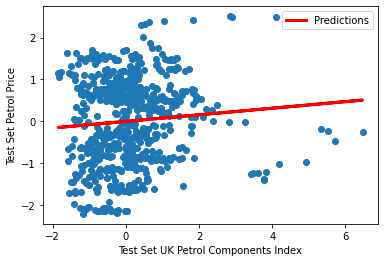

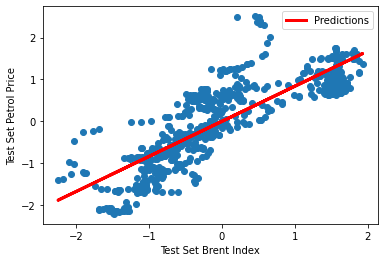

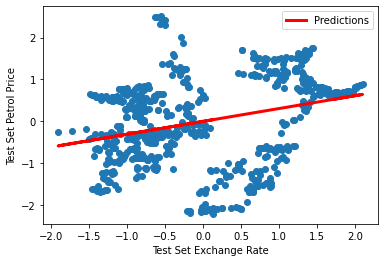

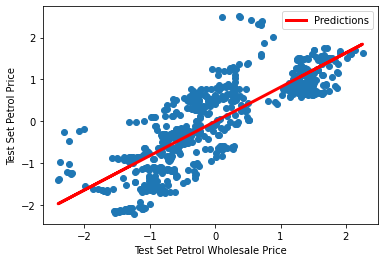

In [378]:
brent_score = r2_score(brent_predictions,test_petrol,sample_weight=None)
usd_score = r2_score(usd_predictions,test_y1,sample_weight=None)

diesel_all_predictions, disel_model = produce_predictions_linear_regression(train_X, test_X, train_y, test_y)
diesel_mse = mean_absolute_percentage_error(test_y,diesel_all_predictions)
diesel_all_score = r2_score(diesel_all_predictions,test_y,sample_weight=None)

cr_predictions, cr_model = produce_predictions_linear_regression(train_cr, test_cr, train_y5, test_y5)
cr_mse = mean_absolute_percentage_error(test_y5,diesel_all_predictions)
cr_score = r2_score(cr_predictions,test_y5,sample_weight=None)

pf_all_predictions,pf_all_model = produce_predictions_linear_regression(train_pf, test_pf, train_y3, test_y3)
pf_mse = mean_absolute_percentage_error(test_y3,pf_all_predictions)
pf_score = r2_score(pf_all_predictions,test_y3,sample_weight=None)

pc_predictions,pc_model = produce_predictions_linear_regression(train_pc, test_pc, train_y6, test_y6)
pc_mse = mean_absolute_percentage_error(test_y6,pc_predictions)
pc_score = r2_score(pc_predictions,test_y6,sample_weight=None)

overall_predictions,overall_all_model = produce_predictions_linear_regression(train_labels, test_labels, train_target, test_target)
overall_mse = mean_absolute_percentage_error(test_target,overall_predictions)
overall_score = r2_score(overall_predictions,test_target,sample_weight=None)

plt.scatter(test_pc, test_y6)
plt.plot(test_pc, pc_predictions, c='r', linewidth=3, label='Predictions')
plt.legend()
plt.xlabel('Test Set UK Petrol Components Index')
plt.ylabel('Test Set Petrol Price')
plt.savefig('uk_priced_components_and_petrol_linear_regression.png')
plt.show()

plt.scatter(test_brent, test_petrol)
plt.plot(test_brent, predictions, c='r', linewidth=3, label='Predictions')
plt.legend()
plt.xlabel('Test Set Brent Index')
plt.ylabel('Test Set Petrol Price')
plt.savefig('brent_and_petrol_linear_regression.png')
plt.show()

plt.scatter(test_E, test_y1)
plt.plot(test_E, usd_predictions, c='r', linewidth=3, label='Predictions')
plt.legend()
plt.xlabel('Test Set Exchange Rate')
plt.ylabel('Test Set Petrol Price')
plt.savefig('usd_exchange_rate_and_petrol_linear_regression.png')
plt.show()

plt.scatter(test_W, test_y2)
plt.plot(test_W, wholesale_predictions, c='r', linewidth=3, label='Predictions')
plt.legend()
plt.xlabel('Test Set Petrol Wholesale Price')
plt.ylabel('Test Set Petrol Price')
plt.savefig('wholesale_and_petrol_linear_regression.png')
plt.show()

pbf_all_predictions,pbf_model = produce_predictions_linear_regression(train_pbf, test_pbf, train_yb3, test_yb3)
pbf_mse = mean_absolute_percentage_error(test_yb3,pbf_all_predictions)
pbf_score = r2_score(pbf_all_predictions,test_yb3,sample_weight=None)

ukc_all_predictions,ukc_model = produce_predictions_linear_regression(train_ukc, test_ukc, train_y4, test_y4)
ukc_mse = mean_absolute_percentage_error(test_y4,ukc_all_predictions)
ukc_score = r2_score(ukc_all_predictions,test_y4,sample_weight=None)


In [379]:
# Save model information
diesel_info = cofValue('UK Diesel Price Related',disel_model.coef_,disel_model.intercept_)
cr_info = cofValue('Crude Oil and Exchange Rate',cr_model.coef_,cr_model.intercept_)
pfall_info = cofValue('Plattis Indexies',pf_all_model.coef_,pf_all_model.intercept_)
all_plattis_bio_info = cofValue('UK Diesel Price Related',pbf_model.coef_,pbf_model.intercept_)
ukbiocomponents_info = cofValue('UK Diesel Price Related',ukc_model.coef_,ukc_model.intercept_)

# open the file in the write mode
with open('D:/ProgramData/Anaconda3/envs/introtoai/IntrotoAICODING/MDM3REP2/coefficients.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(['Name','MSE','R2 Score'])
    writer.writerow([diesel_info.model_name,diesel_mse,diesel_all_score])
    writer.writerow([cr_info.model_name,cr_mse,cr_score])
    writer.writerow([pfall_info.model_name,pf_mse,pf_score])
    writer.writerow([all_plattis_bio_info.model_name,pbf_mse,pbf_score])
    writer.writerow([ukbiocomponents_info.model_name,ukc_mse,ukc_score])

In [380]:
print('Mean squared error on the the test on Brent set: %.2f' % brent_mse )
print('Mean squared error on the the test on USD set: %.2f' % usd_mse )
print('Mean squared error on the the test on Petrol Wholesale set: %.2f' % wholesale_mse )
print('Mean squared error on the the test on diesel sets: %.2f' % diesel_mse )
print('Mean squared error on the the test on Eu Fuel sets: %.2f' % pf_mse )
print('Mean squared error on the the test on Eu Bio Fuel sets: %.2f' % pbf_mse )
print('Mean squared error on the the test on Bio Components Fuel sets: %.2f' % ukc_mse )
print('Mean squared error on the the test on Crude-ExchangeRate sets: %.2f' % cr_mse )

Mean squared error on the the test on Brent set: 24.08
Mean squared error on the the test on USD set: 69.75
Mean squared error on the the test on Petrol Wholesale set: 26.09
Mean squared error on the the test on diesel sets: 2.59
Mean squared error on the the test on Eu Fuel sets: 25.27
Mean squared error on the the test on Eu Bio Fuel sets: 43.38
Mean squared error on the the test on Bio Components Fuel sets: 76.59
Mean squared error on the the test on Crude-ExchangeRate sets: 2.59


In [381]:
# 0 - Beta
# 1 - Intercept
# 2 - R2
# 3 - MSE
with open('D:/ProgramData/Anaconda3/envs/introtoai/IntrotoAICODING/MDM3REP2/single_variable_LR_outputs.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(['ID','coefficient','intercept','R2 Score','MSE'])
    for i in range(len(features[0,:])):
        vector = features[:,i]
        vector = vector.reshape(-1,1)
        values = overall_test(vector,y,0.2)
        beta = float(values[0])
        writer.writerow([i,beta,values[1],values[2],values[3]])

In [382]:
uk_pc_info = cofValue('UK Fuel Components Price',pc_model.coef_,pc_model.intercept_)
plattis_bc_info = cofValue('Plattis Biocomponents',pbf_model.coef_,pbf_model.intercept_)
overall_info = cofValue('All Interested Labels',overall_all_model.coef_,overall_all_model.intercept_)

with open('D:/ProgramData/Anaconda3/envs/introtoai/IntrotoAICODING/MDM3REP2/LR_model_outputs.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(['Model Type','Label(s)','MSE','R2 Score'])
    writer.writerow(['Single-LR','Brent Oil',brent_mse,brent_score])
    writer.writerow(['Single-LR','Exchange Rate USD-Pounds',usd_mse,usd_score])
    writer.writerow(['Single-LR','Plattis Ethenol',-999,-999])
    writer.writerow(['Single-LR','Plattis Biodiesel',-999,-999])
    writer.writerow(['Single-LR',uk_pc_info.model_name,pc_mse,pc_score])
    writer.writerow(['Multi-LR',cr_info.model_name,cr_mse,cr_score])
    writer.writerow(['Multi-LR',plattis_bc_info.model_name,pbf_mse,pbf_score])
    writer.writerow(['Multi-LR',overall_info.model_name,overall_mse,overall_score])

In [350]:
train_all, test_all, train_yall, test_yall = train_test_split(features, y, test_size=0.2, random_state=0,)
f_predictions, f_model = produce_predictions_linear_regression(train_all, test_all, train_yall, test_yall)
f_mse = mean_absolute_percentage_error(test_yall,f_predictions)
f_score = r2_score(f_predictions,test_yall,sample_weight=None)
days = list(range(1,len(f_predictions)+1))

In [351]:
def print_version(test_x,model,mse,R2):
    X = test_x
    MSE = mse
    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    
    params = np.append(model.intercept_,model.coef_)

    MSE_print = np.zeros((len(params),1))
    MSE_print[0] = mse
    
    
    R_score_print = np.zeros((len(params),1))
    R_score_print[0] = R2
    
    Pvalue_print = np.zeros((len(params),1))
    
    for attributeIndex in range (0, 6):
        Pvalue_print[attributeIndex] = float(statsmodel_model.pvalues[attributeIndex])

    return [params,MSE_print,R_score_print,Pvalue_print]

In [352]:
f_score = r2_score(f_predictions,test_yall,sample_weight=None)

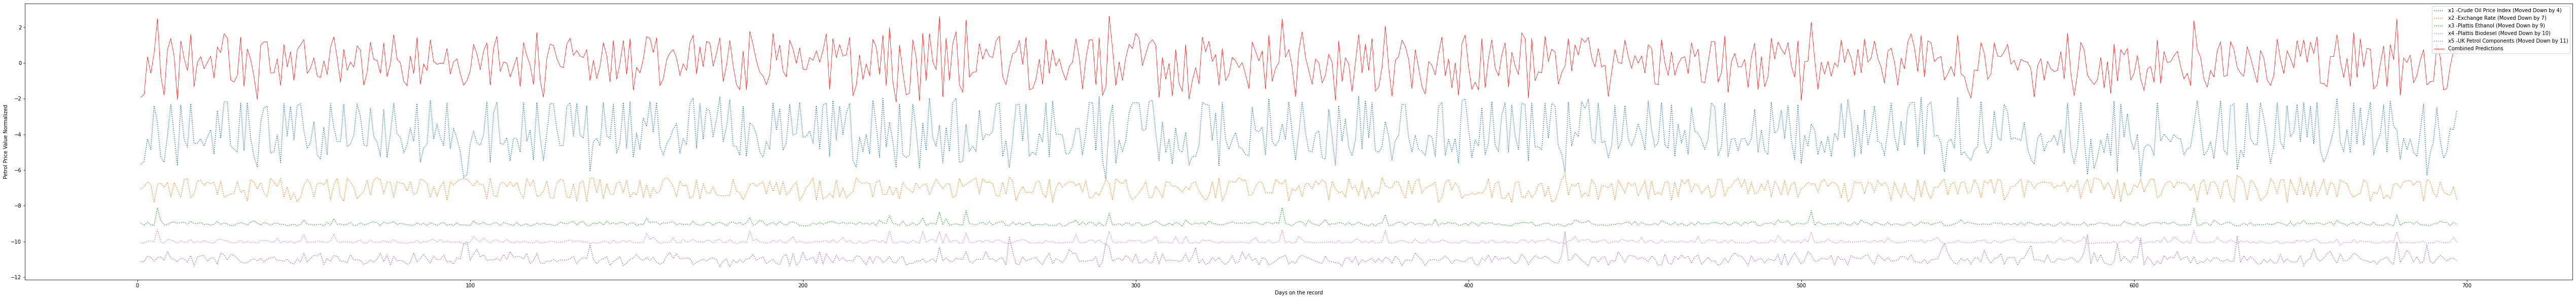

In [353]:
results = print_version(test_labels,overall_all_model,overall_mse,overall_score)

output = pd.DataFrame()
output["Coefficients"],output["P(Xn)"],output["MSE"],output["R2 Score"] = [results[0],results[3],results[1],results[2]]

output.to_csv('D:/ProgramData/Anaconda3/envs/introtoai/IntrotoAICODING/MDM3REP2/multi_variable_LR_outputs.csv')  
coefficients=np.array(output["Coefficients"])


value_matrix = coefficients[1:]*test_labels+coefficients[0]
plt.plot(days,value_matrix[:,0]-4,c='tab:blue',linestyle ="dotted",label='x1 -Crude Oil Price Index (Moved Down by 4)')
plt.plot(days,value_matrix[:,1]-7,c='tab:orange',linestyle ="dotted",label='x2 -Exchange Rate (Moved Down by 7)')
plt.plot(days,value_matrix[:,2]-9,c='tab:green',linestyle ="dotted",label='x3 -Plattis Ethanol (Moved Down by 9)')
plt.plot(days,value_matrix[:,3]-10,c='tab:pink',linestyle ="dotted",label='x4 -Plattis Biodesel (Moved Down by 10)')
plt.plot(days,value_matrix[:,4]-11,c='tab:purple',linestyle ="dotted",label='x5 -UK Petrol Components (Moved Down by 11)')
plt.plot(days,overall_predictions,c='r',linestyle ="-",label='Combined Predictions',linewidth=0.75)
plt.legend()
fig_r01 = plt.gcf()
fig_r01.set_size_inches(90,10)
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.savefig('all_interested_features.png')
plt.show()

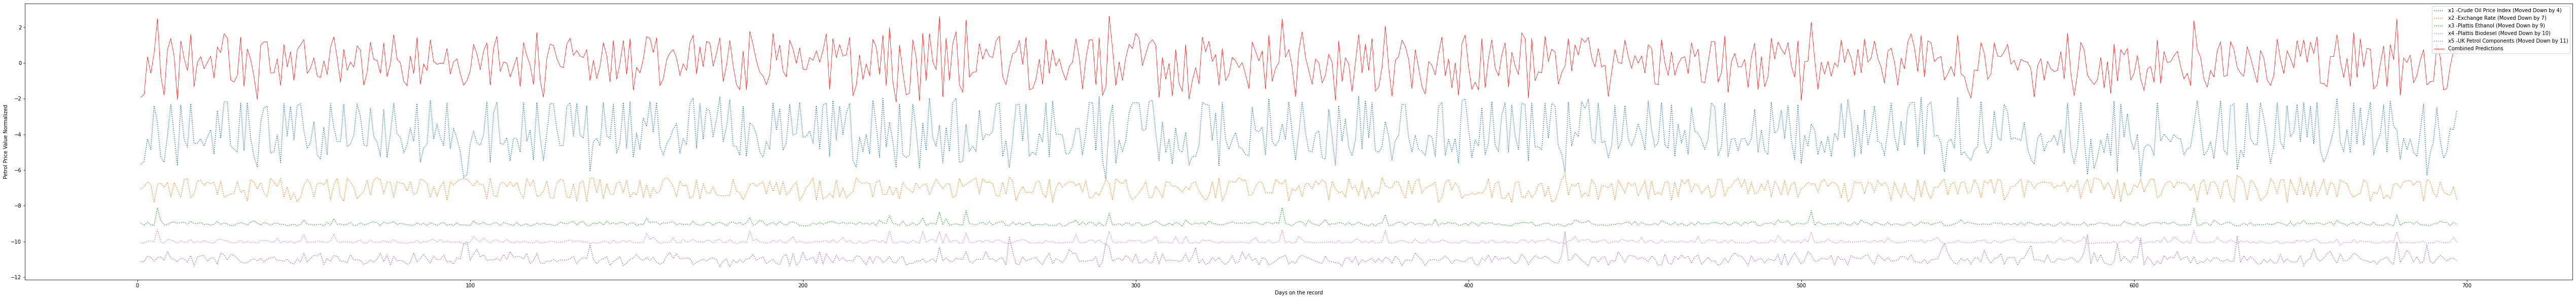

In [354]:
results = print_version(test_labels,overall_all_model,overall_mse,overall_score)

output = pd.DataFrame()
output["Coefficients"],output["P(Xn)"],output["MSE"],output["R2 Score"] = [results[0],results[3],results[1],results[2]]

output.to_csv('D:/ProgramData/Anaconda3/envs/introtoai/IntrotoAICODING/MDM3REP2/multi_variable_LR_outputs.csv')  
coefficients=np.array(output["Coefficients"])


value_matrix = coefficients[1:]*test_labels+coefficients[0]
plt.plot(days,value_matrix[:,0]-4,c='tab:blue',linestyle ="dotted",label='x1 -Crude Oil Price Index (Moved Down by 4)')
plt.plot(days,value_matrix[:,1]-7,c='tab:orange',linestyle ="dotted",label='x2 -Exchange Rate (Moved Down by 7)')
plt.plot(days,value_matrix[:,2]-9,c='tab:green',linestyle ="dotted",label='x3 -Plattis Ethanol (Moved Down by 9)')
plt.plot(days,value_matrix[:,3]-10,c='tab:pink',linestyle ="dotted",label='x4 -Plattis Biodesel (Moved Down by 10)')
plt.plot(days,value_matrix[:,4]-11,c='tab:purple',linestyle ="dotted",label='x5 -UK Petrol Components (Moved Down by 11)')
plt.plot(days,overall_predictions,c='r',linestyle ="-",label='Combined Predictions',linewidth=0.75)
plt.legend()
fig_r01 = plt.gcf()
fig_r01.set_size_inches(90,10)
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.savefig('all_interested_features.png')
plt.show()

In [315]:
days_all = days

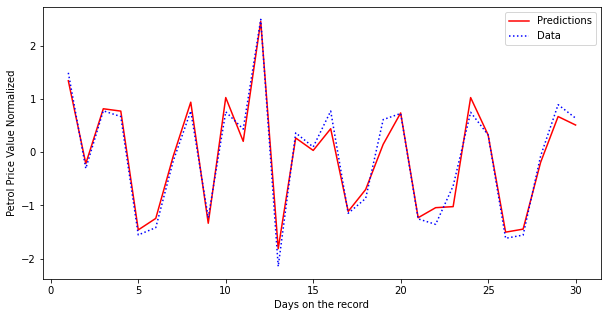

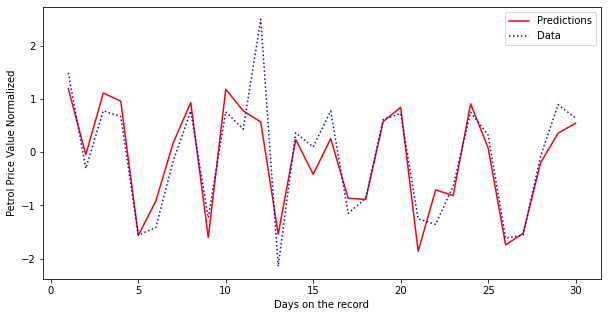

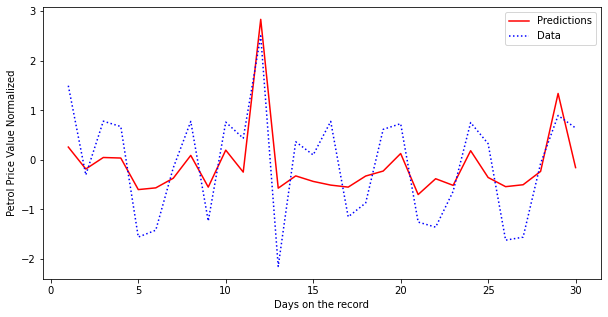

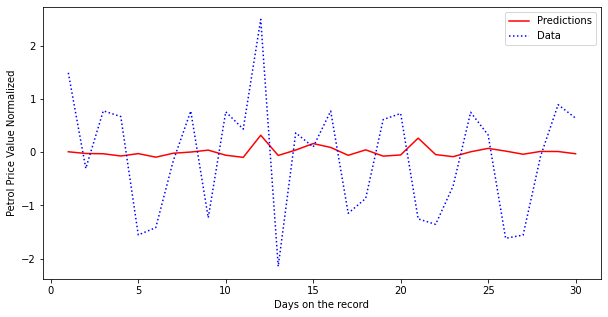

In [207]:

days = days_all[0:30]

plt.plot(days,overall_predictions[667:],c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_target[667:],c='b',linestyle =":",label='Data')
fig_r3 = plt.gcf()
fig_r3.set_size_inches(10,5)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.savefig('full_prediction_plots.png')
plt.show()

plt.plot(days,cr_predictions[667:],c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_y5[667:],c='b',linestyle =":",label='Data')
fig_r3 = plt.gcf()
fig_r3.set_size_inches(10,5)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.savefig('crude_oil_exchange_rate_prediction_plots.png')
plt.show()

plt.plot(days,pbf_all_predictions[667:],c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_yb3[667:],c='b',linestyle =":",label='Data')
fig_r3 = plt.gcf()
fig_r3.set_size_inches(10,5)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.savefig('plattis_biocomponents_prediction_plots.png')
plt.show()

plt.plot(days,ukc_all_predictions[667:],c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_y4[667:],c='b',linestyle =":",label='Data')
fig_r3 = plt.gcf()
fig_r3.set_size_inches(10,5)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.savefig('uk_biocomponents_prediction_plots.png')
plt.show()

# open the file in the write mode
with open('D:/ProgramData/Anaconda3/envs/introtoai/IntrotoAICODING/MDM3REP2/coefficients.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(['Name','MSE','R2 Score'])
    writer.writerow([diesel_info.model_name,diesel_mse,diesel_all_score])
    writer.writerow([cr_info.model_name,cr_mse,cr_score])
    writer.writerow([pfall_info.model_name,pf_mse,pf_score])
    writer.writerow([all_plattis_bio_info.model_name,pbf_mse,pbf_score])
    writer.writerow([ukbiocomponents_info.model_name,ukc_mse,ukc_score])

In [208]:
cr_info = cofValue('Crude and Exchange Rate',cr_model.coef_,cr_model.intercept_)

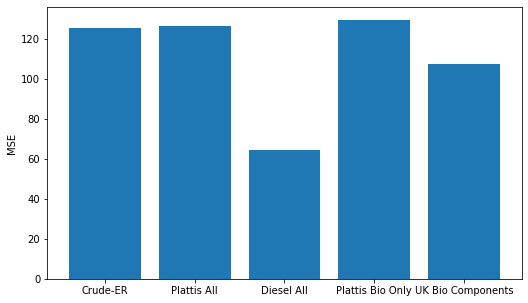

In [209]:
mses = [wholesale_mse,pf_mse, diesel_mse, pbf_mse, ukc_mse]
labels = ['Crude-ER','Plattis All', 'Diesel All', 'Plattis Bio Only','UK Bio Components']
y_pos = np.arange(len(mses))
plt.bar(y_pos, mses)
plt.xticks(y_pos, labels)
plt.ylabel('MSE')
fig_mse = plt.gcf()
fig_mse.set_size_inches(8.5,5)
plt.savefig('important_predictions_mse_test.png')
plt.show()

In [210]:
row = ('Crude and Exchange Rate',cr_model.coef_,cr_model.intercept_)

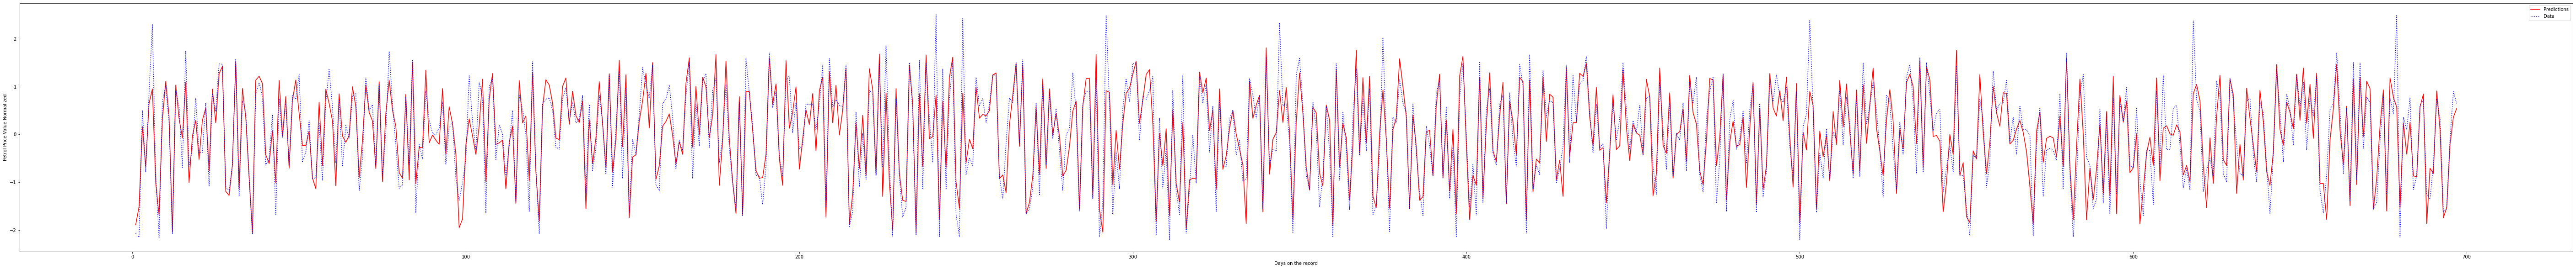

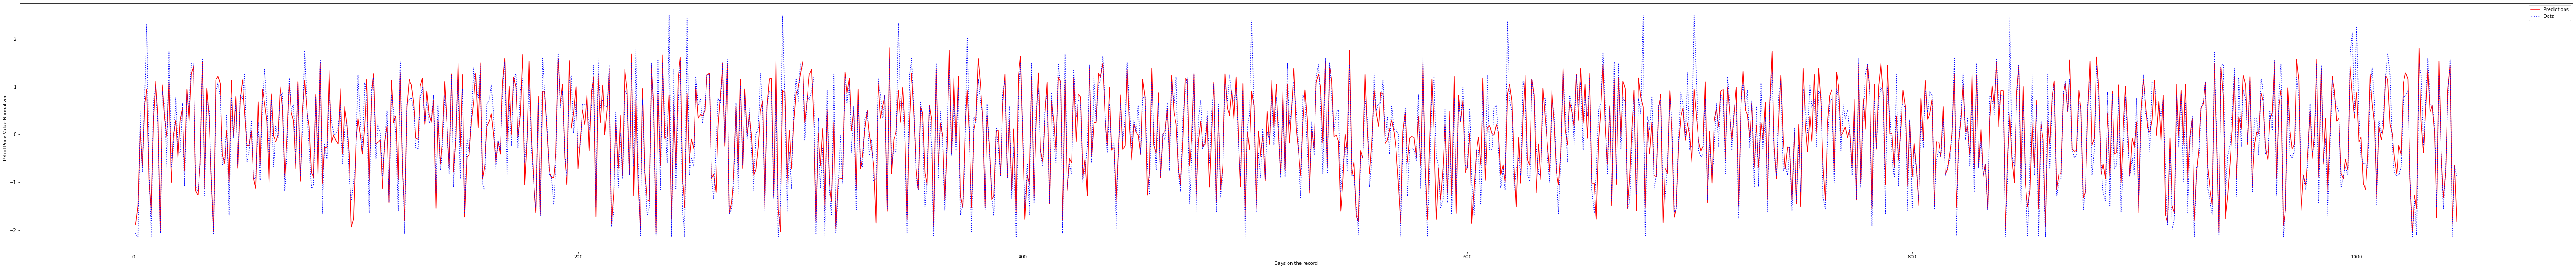

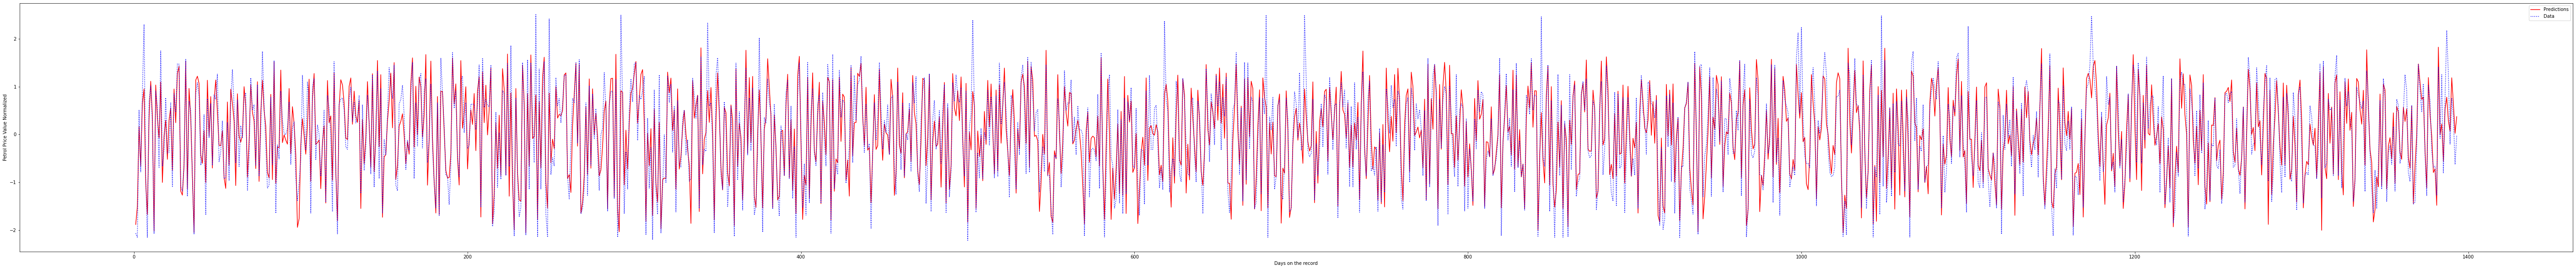

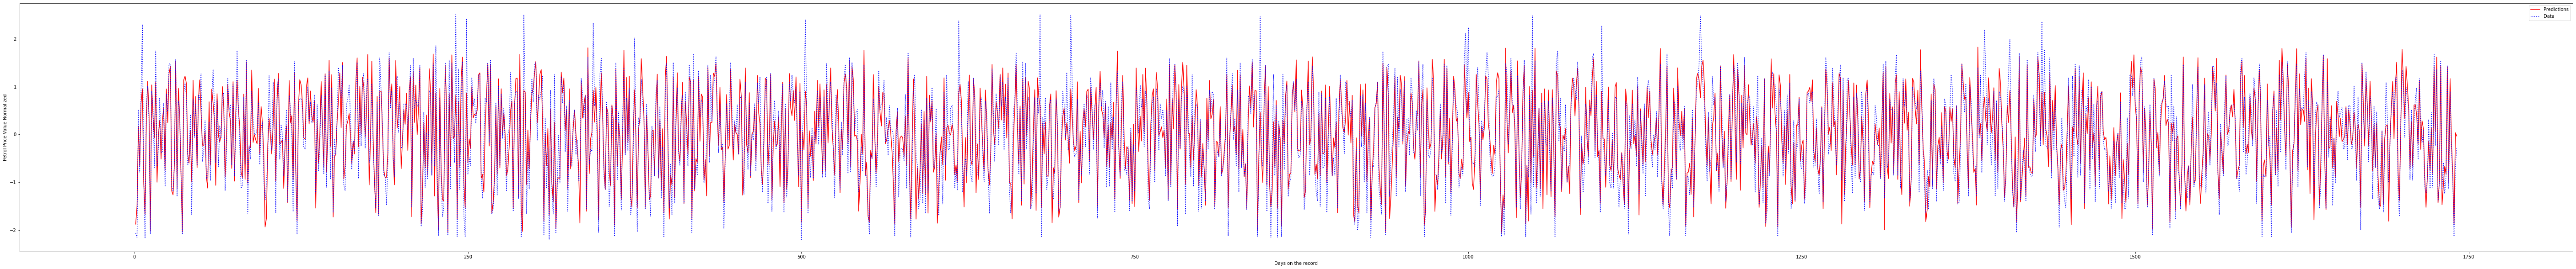

In [211]:
train_80_cr, test_80_cr, train_80_y, test_80_y = train_test_split(curde_and_exchange_r, y, test_size=0.2, random_state=0,)
train_70_cr, test_70_cr, train_70_y, test_70_y = train_test_split(curde_and_exchange_r, y, test_size=0.3, random_state=0,)
train_60_cr, test_60_cr, train_60_y, test_60_y = train_test_split(curde_and_exchange_r, y, test_size=0.4, random_state=0,)
train_50_cr, test_50_cr, train_50_y, test_50_y = train_test_split(curde_and_exchange_r, y, test_size=0.5, random_state=0,)

cr_80_predictions, cr_80_model = produce_predictions_linear_regression(train_80_cr, test_80_cr, train_80_y, test_80_y)
cr_80_mse = mean_absolute_percentage_error(test_80_y,cr_80_predictions)
cr_80_score = r2_score(cr_80_predictions,test_80_y,sample_weight=None)

cr_70_predictions, cr_70_model = produce_predictions_linear_regression(train_70_cr, test_70_cr, train_70_y, test_70_y)
cr_70_mse = mean_absolute_percentage_error(test_70_y,cr_70_predictions)
cr_70_score = r2_score(cr_70_predictions,test_70_y,sample_weight=None)

cr_60_predictions, cr_60_model = produce_predictions_linear_regression(train_60_cr, test_60_cr, train_60_y, test_60_y)
cr_60_mse = mean_absolute_percentage_error(test_60_y,cr_60_predictions)
cr_60_score = r2_score(cr_60_predictions,test_60_y,sample_weight=None)

cr_50_predictions, cr_50_model = produce_predictions_linear_regression(train_50_cr, test_50_cr, train_50_y, test_50_y)
cr_50_mse = mean_absolute_percentage_error(test_50_y,cr_50_predictions)
cr_50_score = r2_score(cr_50_predictions,test_50_y,sample_weight=None)

days = list(range(1,len(test_80_y)+1))
plt.plot(days,cr_80_predictions,c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_80_y,c='b',linestyle =":",label='Data')
fig_r1 = plt.gcf()
fig_r1.set_size_inches(100,10)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.show()

days = list(range(1,len(test_70_y)+1))
plt.plot(days,cr_70_predictions,c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_70_y,c='b',linestyle =":",label='Data')
fig_r2 = plt.gcf()
fig_r2.set_size_inches(100,10)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.show()

days = list(range(1,len(test_60_y)+1))
plt.plot(days,cr_60_predictions,c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_60_y,c='b',linestyle =":",label='Data')
fig_r3 = plt.gcf()
fig_r3.set_size_inches(100,10)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.show()

days = list(range(1,len(test_50_y)+1))
plt.plot(days,cr_50_predictions,c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_50_y,c='b',linestyle =":",label='Data')
fig_r4 = plt.gcf()
fig_r4.set_size_inches(100,10)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')

plt.show()

# open the file in the write mode
with open('D:/ProgramData/Anaconda3/envs/introtoai/IntrotoAICODING/MDM3REP2/discussion_section_data.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(['Name','MSE','R-Square Test Score','MSE','R-Square Test Score','MSE','R-Square Test Score','MSE','R-Square Test Score'])
    writer.writerow(['Multi-Variable Linear Regression',cr_80_mse,cr_80_score,cr_70_mse,cr_70_score,cr_60_mse,cr_60_score,cr_50_mse,cr_50_score])


In [212]:
label_matrix = curde_and_exchange_r
target_vector = y
end = len(label_matrix)
n = round(end-len(label_matrix)*0.2)
l = round(len(label_matrix)*0.2)
i = 2*(end-n)
model_y = target_vector[l:n]
model_x = label_matrix[:n-l,:]
final_test_y = target_vector[n:]
final_test_x = label_matrix[(end-2*l):(end-l):,:]

days = list(range(1,len(try_y)+1))
plt.plot(days,try_y,c='r',linestyle ="-",label='Predictions')
plt.plot(days,try_y1,c='g',linestyle ="-",label='Predictions')
plt.plot(days,target_vector,c='b',linestyle =":",label='Data')
fig = plt.gcf()
fig.set_size_inches(90,10)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.show()


NameError: name 'try_y' is not defined

In [ ]:
def select_x_and_y(label_matrix,target_vector):
    end = len(label_matrix)
    n = round(end-len(label_matrix)*0.2)
    l = round(len(label_matrix)*0.2)
    i = 2*(end-n)
    model_y = target_vector[l:n]
    model_x = label_matrix[:n-l,:]
    final_test_y = target_vector[n:]
    final_test_x = label_matrix[(end-2*l):(end-l):,:]
        
    return model_x, model_y, final_test_x, final_test_y

[[-2.94399700e-01 -2.63984557e-01]
 [-3.34369011e-01 -2.14327530e-01]
 [-2.91601848e-01 -1.54029711e-01]
 ...
 [-2.25566540e-04 -7.24376136e-01]
 [-4.41918093e-02 -7.52751580e-01]
 [-9.53525281e-02 -7.67648688e-01]]


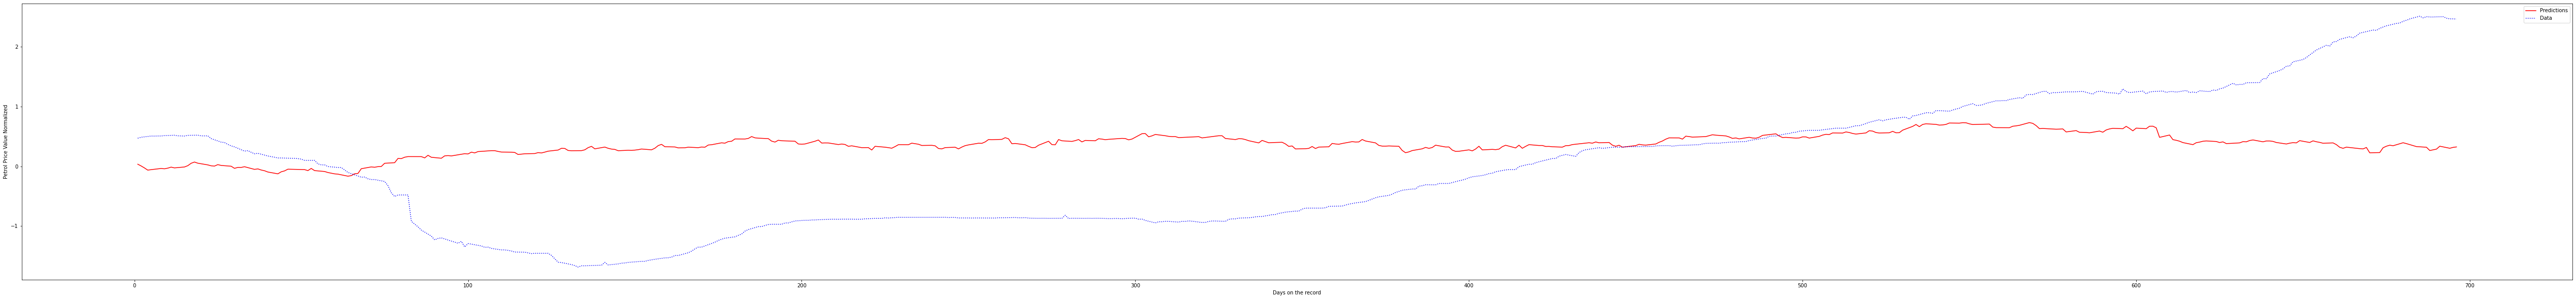

In [213]:
cr_select,y_select,test_cr_s,test_y_s = select_x_and_y(curde_and_exchange_r,y)

train_cr, test_cr, train_y, test_y = train_test_split(cr_select, y_select, test_size=0.2, random_state=0,)

# data fitting
cr_lag_model = LinearRegression().fit(train_cr, train_y)
print(test_cr_s)
# make predictions
cr_lag_predictions = cr_lag_model.predict(test_cr_s)

cr_lag_mse = mean_absolute_percentage_error(test_y_s,cr_lag_predictions)
cr_lag_score = r2_score(cr_lag_predictions,test_y_s,sample_weight=None)

days = list(range(1,len(test_y_s)+1))
plt.plot(days,cr_lag_predictions,c='r',linestyle ="-",label='Predictions')
plt.plot(days,test_y_s,c='b',linestyle =":",label='Data')
fig = plt.gcf()
fig.set_size_inches(90,10)
plt.legend()
plt.xlabel('Days on the record')
plt.ylabel('Petrol Price Value Normalized')
plt.show()
    